In [216]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
%matplotlib inline

## Data Preparation

In [218]:
df = pd.read_csv('Data.csv')

In [219]:
df

,Unnamed: 0,seq,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,chi,sharp,Jvar,Kvar,Lvar,Kamp,Var_Status
0,1,16707,17.963,0.0701,17.133,0.0198,16.686,0.0254,1.333,0.518,3.473,0.942,4.100,0.363,1
1,2,18468,99.999,9.9999,99.999,9.9999,17.990,0.2634,1.535,1.131,3.934,0.920,4.535,1.462,1
2,3,19086,18.975,0.1687,17.968,0.2616,17.945,0.0691,0.788,-0.288,4.828,0.955,5.782,0.584,1
3,4,1189,20.928,0.1792,19.093,0.4665,17.567,0.0725,0.809,-0.965,5.817,0.973,7.094,0.619,1
4,5,18133,18.930,0.2629,18.227,0.0489,17.237,0.0903,1.425,0.847,4.114,0.940,4.845,0.761,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,4746,12935,20.830,0.1582,19.834,0.1409,20.051,0.0641,1.015,2.432,0.071,0.888,0.079,99.999,0
4746,4747,15367,20.536,0.4705,19.584,0.2905,19.338,0.0252,0.746,-3.713,0.420,0.990,0.521,99.999,0
4747,4748,11339,19.968,0.1416,18.963,0.0490,18.899,0.0733,0.890,0.004,1.034,0.939,1.217,99.999,0
4748,4749,11641,19.034,0.0569,18.156,0.0186,17.843,0.0175,1.069,0.680,0.381,0.945,0.451,99.999,0


In [220]:
data = df[['Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','chi','sharp','Jvar','Kvar','Lvar','Kamp','Var_Status']]

In [221]:
data

,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,chi,sharp,Jvar,Kvar,Lvar,Kamp,Var_Status
0,17.963,0.0701,17.133,0.0198,16.686,0.0254,1.333,0.518,3.473,0.942,4.100,0.363,1
1,99.999,9.9999,99.999,9.9999,17.990,0.2634,1.535,1.131,3.934,0.920,4.535,1.462,1
2,18.975,0.1687,17.968,0.2616,17.945,0.0691,0.788,-0.288,4.828,0.955,5.782,0.584,1
3,20.928,0.1792,19.093,0.4665,17.567,0.0725,0.809,-0.965,5.817,0.973,7.094,0.619,1
4,18.930,0.2629,18.227,0.0489,17.237,0.0903,1.425,0.847,4.114,0.940,4.845,0.761,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,20.830,0.1582,19.834,0.1409,20.051,0.0641,1.015,2.432,0.071,0.888,0.079,99.999,0
4746,20.536,0.4705,19.584,0.2905,19.338,0.0252,0.746,-3.713,0.420,0.990,0.521,99.999,0
4747,19.968,0.1416,18.963,0.0490,18.899,0.0733,0.890,0.004,1.034,0.939,1.217,99.999,0
4748,19.034,0.0569,18.156,0.0186,17.843,0.0175,1.069,0.680,0.381,0.945,0.451,99.999,0


In [222]:
data['Var_Status'].value_counts()

0    4000
1     750
Name: Var_Status, dtype: int64

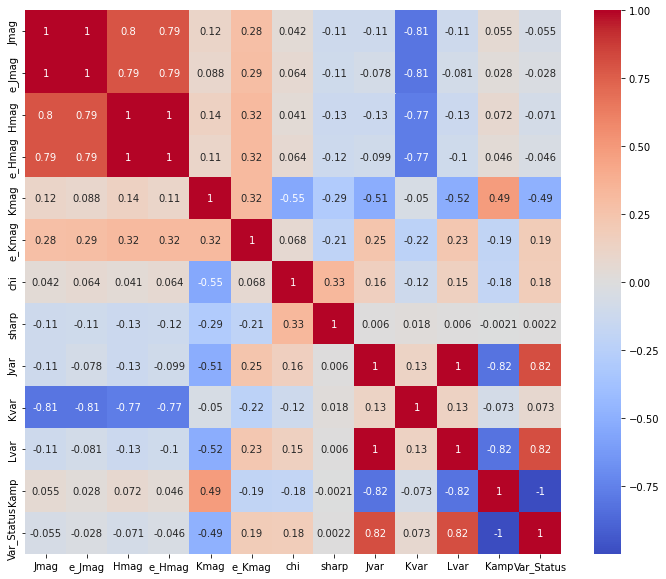

In [223]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [224]:
X = data[['Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','chi','sharp','Jvar','Kvar','Lvar','Kamp']]
Y = data[['Var_Status']]

In [225]:
X_learning, X_test, Y_learning, Y_test = train_test_split(X, Y,test_size=0.2, random_state=42, stratify=Y)

In [226]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_learning, Y_learning,test_size=0.2, random_state=42, stratify=Y_learning)

In [227]:
X_train.shape

(3040, 12)

In [228]:
X_valid.shape

(760, 12)

In [229]:
X_test.shape

(950, 12)

## Training Classifiers

### Naive Bayes

In [230]:
nb = make_pipeline(StandardScaler(), GaussianNB())

In [231]:
nb

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [232]:
nb.fit(X_train, Y_train)

c:\users\youse\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [233]:
nb_valid_preds = nb.predict(X_valid)

In [234]:
print(classification_report(Y_valid, nb_valid_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       640
           1   1.000000  1.000000  1.000000       120

    accuracy                       1.000000       760
   macro avg   1.000000  1.000000  1.000000       760
weighted avg   1.000000  1.000000  1.000000       760



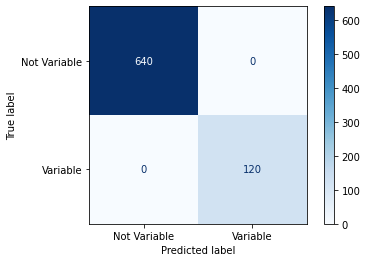

In [235]:
nb_cm = confusion_matrix(Y_valid, nb_valid_preds)
nb_cm_disp = ConfusionMatrixDisplay(nb_cm, display_labels=np.array(['Not Variable', 'Variable']))
nb_cm_disp.plot(cmap='Blues')
plt.show()

### KNN

In [236]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [237]:
knn

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [238]:
knn_param_grid = {'kneighborsclassifier__n_neighbors':[2, 5, 10]}

In [239]:
knn_search = GridSearchCV(knn, knn_param_grid, n_jobs=-1, cv=5)

In [240]:
knn_search.fit(X_train, Y_train)

c:\users\youse\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [2, 5, 10]})

In [241]:
knn_search.best_params_

{'kneighborsclassifier__n_neighbors': 5}

In [242]:
knn_valid_preds = knn_search.predict(X_valid)

In [243]:
print(classification_report(Y_valid, knn_valid_preds, digits=6))

              precision    recall  f1-score   support

           0   0.996885  1.000000  0.998440       640
           1   1.000000  0.983333  0.991597       120

    accuracy                       0.997368       760
   macro avg   0.998442  0.991667  0.995018       760
weighted avg   0.997377  0.997368  0.997359       760



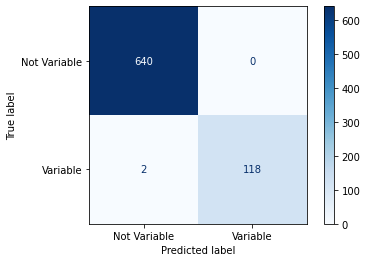

In [244]:
knn_cm = confusion_matrix(Y_valid, knn_valid_preds)
knn_cm_disp = ConfusionMatrixDisplay(knn_cm, display_labels=np.array(['Not Variable', 'Variable']))
knn_cm_disp.plot(cmap='Blues')
plt.show()

### Random Forest

In [245]:
rf = RandomForestClassifier()

In [246]:
rf_param_grid = {'n_estimators':[10, 500, 100, 200], 'criterion': ['gini', 'entropy']}

In [247]:
rf_search = GridSearchCV(rf, rf_param_grid, n_jobs=-1, cv=5)

In [248]:
rf_search.fit(X_train, Y_train)

c:\users\youse\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 500, 100, 200]})

In [249]:
rf_search.best_params_

{'criterion': 'gini', 'n_estimators': 500}

In [250]:
rf_valid_preds = rf_search.predict(X_valid)

In [251]:
print(classification_report(Y_valid, rf_valid_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       640
           1   1.000000  1.000000  1.000000       120

    accuracy                       1.000000       760
   macro avg   1.000000  1.000000  1.000000       760
weighted avg   1.000000  1.000000  1.000000       760



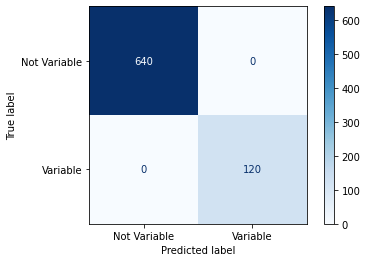

In [252]:
rf_cm = confusion_matrix(Y_valid, rf_valid_preds)
rf_cm_disp = ConfusionMatrixDisplay(rf_cm, display_labels=np.array(['Not Variable', 'Variable']))
rf_cm_disp.plot(cmap='Blues')
plt.show()

### SVM

In [253]:
svc = make_pipeline(StandardScaler(), SVC())

In [254]:
svc

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [255]:
svc_param_grid = [
  {'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['linear']},
  {'svc__C': [1, 10, 100, 1000], 'svc__gamma': [0.001, 0.0001], 'svc__kernel': ['rbf']},
 ]

In [256]:
svc_search = GridSearchCV(svc, svc_param_grid, n_jobs=-1, cv=5)

In [257]:
svc_search.fit(X_train, Y_train)

c:\users\youse\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [1, 10, 100, 1000],
                          'svc__kernel': ['linear']},
                         {'svc__C': [1, 10, 100, 1000],
                          'svc__gamma': [0.001, 0.0001],
                          'svc__kernel': ['rbf']}])

In [258]:
svc_search.best_params_

{'svc__C': 1, 'svc__kernel': 'linear'}

In [259]:
svc_valid_preds = svc_search.predict(X_valid)

In [260]:
print(classification_report(Y_valid, svc_valid_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       640
           1   1.000000  1.000000  1.000000       120

    accuracy                       1.000000       760
   macro avg   1.000000  1.000000  1.000000       760
weighted avg   1.000000  1.000000  1.000000       760



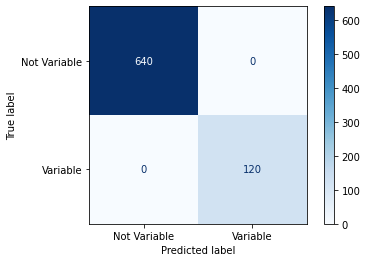

In [261]:
svc_cm = confusion_matrix(Y_valid, svc_valid_preds)
svc_cm_disp = ConfusionMatrixDisplay(svc_cm, display_labels=np.array(['Not Variable', 'Variable']))
svc_cm_disp.plot(cmap='Blues')
plt.show()

### Stacked Model

In [262]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, criterion='gini')),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', make_pipeline(StandardScaler(), GaussianNB())),
    ('svm', make_pipeline(StandardScaler(), SVC(C=1, kernel='linear')))
]

In [263]:
stacked_clf = StackingClassifier(n_jobs = -1, estimators = estimators, final_estimator = make_pipeline(StandardScaler(), SVC(random_state = 42)))

In [264]:
stacked_clf.fit(X_train, Y_train)

c:\users\youse\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\youse\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=10)),
                               ('knn', KNeighborsClassifier()),
                               ('nb',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('gaussiannb', GaussianNB())])),
                               ('svm',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(C=1, kernel='linear'))]))],
                   final_estimator=Pipeline(steps=[('standardscaler',
                                                    StandardScaler()),
                                                   ('svc',
                                                    SVC(random_state=42))]),
              

In [265]:
stacked_clf_valid_preds = stacked_clf.predict(X_valid)

c:\users\youse\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [266]:
print(classification_report(Y_valid, stacked_clf_valid_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       640
           1   1.000000  1.000000  1.000000       120

    accuracy                       1.000000       760
   macro avg   1.000000  1.000000  1.000000       760
weighted avg   1.000000  1.000000  1.000000       760



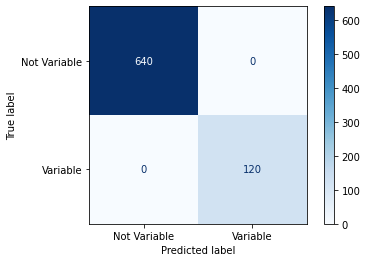

In [267]:
stacked_clf_cm = confusion_matrix(Y_valid, stacked_clf_valid_preds)
stacked_clf_cm_disp = ConfusionMatrixDisplay(stacked_clf_cm, display_labels=np.array(['Not Variable', 'Variable']))
stacked_clf_cm_disp.plot(cmap='Blues')
plt.show()

## Test Set Predictions

### Naive Bayes

In [268]:
nb_test_preds = nb.predict(X_test)
print(classification_report(Y_test, nb_test_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       800
           1   1.000000  1.000000  1.000000       150

    accuracy                       1.000000       950
   macro avg   1.000000  1.000000  1.000000       950
weighted avg   1.000000  1.000000  1.000000       950



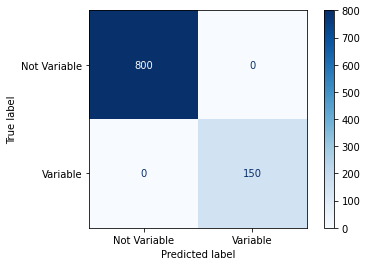

In [269]:
nb_test_cm = confusion_matrix(Y_test, nb_test_preds)
nb_test_cm_disp = ConfusionMatrixDisplay(nb_test_cm, display_labels=np.array(['Not Variable', 'Variable']))
nb_test_cm_disp.plot(cmap='Blues')
plt.show()

## KNN

In [270]:
knn_test_preds = knn_search.predict(X_test)
print(classification_report(Y_test, knn_test_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.998750  0.999375       800
           1   0.993377  1.000000  0.996678       150

    accuracy                       0.998947       950
   macro avg   0.996689  0.999375  0.998026       950
weighted avg   0.998954  0.998947  0.998949       950



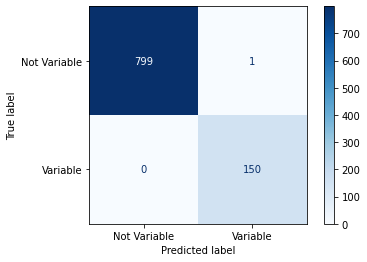

In [271]:
knn_test_cm = confusion_matrix(Y_test, knn_test_preds)
knn_test_cm_disp = ConfusionMatrixDisplay(knn_test_cm, display_labels=np.array(['Not Variable', 'Variable']))
knn_test_cm_disp.plot(cmap='Blues')
plt.show()

### Random Forest

In [272]:
rf_test_preds = rf_search.predict(X_test)
print(classification_report(Y_test, rf_test_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       800
           1   1.000000  1.000000  1.000000       150

    accuracy                       1.000000       950
   macro avg   1.000000  1.000000  1.000000       950
weighted avg   1.000000  1.000000  1.000000       950



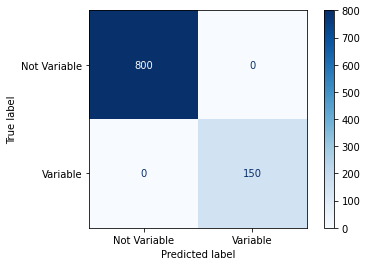

In [273]:
rf_test_cm = confusion_matrix(Y_test, rf_test_preds)
rf_test_cm_disp = ConfusionMatrixDisplay(rf_test_cm, display_labels=np.array(['Not Variable', 'Variable']))
rf_test_cm_disp.plot(cmap='Blues')
plt.show()

### SVM

In [274]:
svc_test_preds = svc_search.predict(X_test)
print(classification_report(Y_test, svc_test_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       800
           1   1.000000  1.000000  1.000000       150

    accuracy                       1.000000       950
   macro avg   1.000000  1.000000  1.000000       950
weighted avg   1.000000  1.000000  1.000000       950



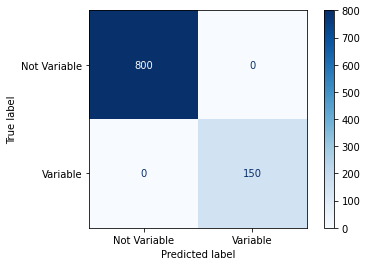

In [275]:
svc_test_cm = confusion_matrix(Y_test, svc_test_preds)
svc_test_cm_disp = ConfusionMatrixDisplay(svc_test_cm, display_labels=np.array(['Not Variable', 'Variable']))
svc_test_cm_disp.plot(cmap='Blues')
plt.show()

### Stacked Model

In [276]:
stacked_clf_test_preds = stacked_clf.predict(X_test)
print(classification_report(Y_test, stacked_clf_test_preds, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       800
           1   1.000000  1.000000  1.000000       150

    accuracy                       1.000000       950
   macro avg   1.000000  1.000000  1.000000       950
weighted avg   1.000000  1.000000  1.000000       950



c:\users\youse\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


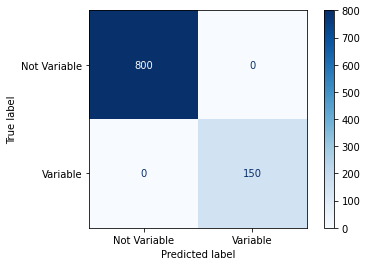

In [277]:
stacked_clf_test_cm = confusion_matrix(Y_test, stacked_clf_test_preds)
stacked_clf_test_cm_disp = ConfusionMatrixDisplay(stacked_clf_test_cm, display_labels=np.array(['Not Variable', 'Variable']))
stacked_clf_test_cm_disp.plot(cmap='Blues')
plt.show()